In [1]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#necessary libraries to handle dataframes and numeric data 
import pandas as pd
import numpy as np

# for visuals
import pylab as plt
import seaborn as sns
%matplotlib inline

# for data splitting into train and test
from sklearn.model_selection import train_test_split as tts

#the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#the metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# to standardize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#to save the model
import pickle

# to get the most important columns
from sklearn.inspection import permutation_importance

## Preprocessing 1:

Keeping outliers,downsampling non-fraud cases, getting dummies for column 'type', standardising using standardscaler.

In [2]:
data_pp1=pd.read_csv('../../data/second/data_pp1.csv')

Importing the data

In [3]:
data_pp1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,0,1
1,1,181.0,181.0,0.0,21182.0,0.0,1,0,0,1,0,0,0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0,0,0,0,0,1
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,0,1,0,0,0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0,0,0,0,0,1


In [4]:
X_pp1=data_pp1.drop('isFraud', axis=1)
y_pp1=data_pp1['isFraud']

Defining my target column

In [5]:
X_train1, X_test1, y_train1, y_test1 =tts(X_pp1, y_pp1, 
                                       random_state=42,
                                       stratify=y_pp1)


Splitting into train and test

In [6]:
escalador = StandardScaler()   
 
escalador.fit(X_train1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
 
X_train1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = escalador.transform(X_train1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])   
X_test1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = escalador.transform(X_test1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])  


Standardizing the data using standardscaler

In [7]:
X_train1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
14450,277,-0.439946,-0.384908,-0.211217,-0.296040,-0.386025,0,0,0,0,1,0
6029,546,-0.429963,-0.379685,-0.212037,-0.296040,-0.386025,0,0,0,0,0,1
12951,300,-0.260930,-0.370837,-0.050621,-0.274270,-0.386025,0,1,0,0,0,0
8697,370,-0.308936,-0.387496,-0.212037,0.551333,0.412887,0,0,1,0,0,0
3129,276,0.399893,0.106781,-0.212037,-0.296040,-0.386025,0,0,0,0,0,1


Seeing the data after standardization

In [40]:
lr_pp1=LogisticRegression()
dt_pp1=DecisionTreeClassifier()
rf_pp1=RandomForestClassifier()

Initiating the models

In [41]:
lr_pp1.fit(X_train1, y_train1)
dt_pp1.fit(X_train1, y_train1)
rf_pp1.fit(X_train1, y_train1)

RandomForestClassifier()

Training the models

In [42]:
y_test_pred_lr_pp1 = lr_pp1.predict(X_test1)
y_test_pred_dt_pp1 = dt_pp1.predict(X_test1)
y_test_pred_rf_pp1 = rf_pp1.predict(X_test1)

In [43]:
y_train_pred_lr_pp1 = lr_pp1.predict(X_train1)
y_train_pred_dt_pp1 = dt_pp1.predict(X_train1)
y_train_pred_rf_pp1 = rf_pp1.predict(X_train1)

Getting the predictions for both test and train data (I need to get both to check whether my model is overfitted or not)

In [44]:
#Getting the metrics for each model for train and test 

def metrics(y_test, y_test_pred_model, y_train, y_train_pred_model, model):
    
    accuracy_test = accuracy_score(y_test, y_test_pred_model)
    precision_test = precision_score(y_test, y_test_pred_model)
    recall_test = recall_score(y_test, y_test_pred_model)
    f1_test = f1_score(y_test, y_test_pred_model)
    kappa_test = cohen_kappa_score(y_test, y_test_pred_model)

    accuracy_train = accuracy_score(y_train, y_train_pred_model)
    precision_train = precision_score(y_train, y_train_pred_model)
    recall_train = recall_score(y_train, y_train_pred_model)
    f1_train = f1_score(y_train, y_train_pred_model)
    kappa_train = cohen_kappa_score(y_train, y_train_pred_model)

    
    df = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                       'precision': [precision_test, precision_train],
                       'recall': [recall_test, recall_train], 
                       'f1': [f1_test, f1_train],
                       'kapppa': [kappa_test, kappa_train],
                       'set': ['test', 'train' ]})
    
    df['model'] = model
    return df

In [47]:
results_lr_pp1= metrics(y_test1, y_test_pred_lr_pp1, y_train1, y_train_pred_lr_pp1, 'Logistic Regression pp1')
results_dt_pp1= metrics(y_test1, y_test_pred_dt_pp1, y_train1, y_train_pred_dt_pp1, 'Decision Tree pp1')
results_rf_pp1= metrics(y_test1, y_test_pred_rf_pp1, y_train1, y_train_pred_rf_pp1, 'Random Forest pp1')
results_pp1=pd.concat([results_lr_pp1, results_dt_pp1, results_rf_pp1], axis=0)

Getting the metrics for my model

In [48]:
results_pp1

,accuracy,precision,recall,f1,kapppa,set,model
0,0.912345,0.918438,0.905017,0.911678,0.824689,test,Logistic Regression pp1
1,0.914522,0.917990,0.910390,0.914174,0.829045,train,Logistic Regression pp1
0,0.988313,0.987360,0.989284,0.988321,0.976625,test,Decision Tree pp1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree pp1
0,0.991965,0.985577,0.998539,0.992015,0.983930,test,Random Forest pp1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Random Forest pp1


For logistic regression the model is working ok but it could be better. The metric that interests me the most out of all the metrics above is the 'recall' since it is the one taking into account the False Negatives which are the predictions I want to decrease as much as possible. I prefer to have False Positives over False Negatives in this project. 

As for decision tree and random forest they are working very well. The train metrics are higher than the test ones, as expected, but not as much higher to suggest overfitting. 

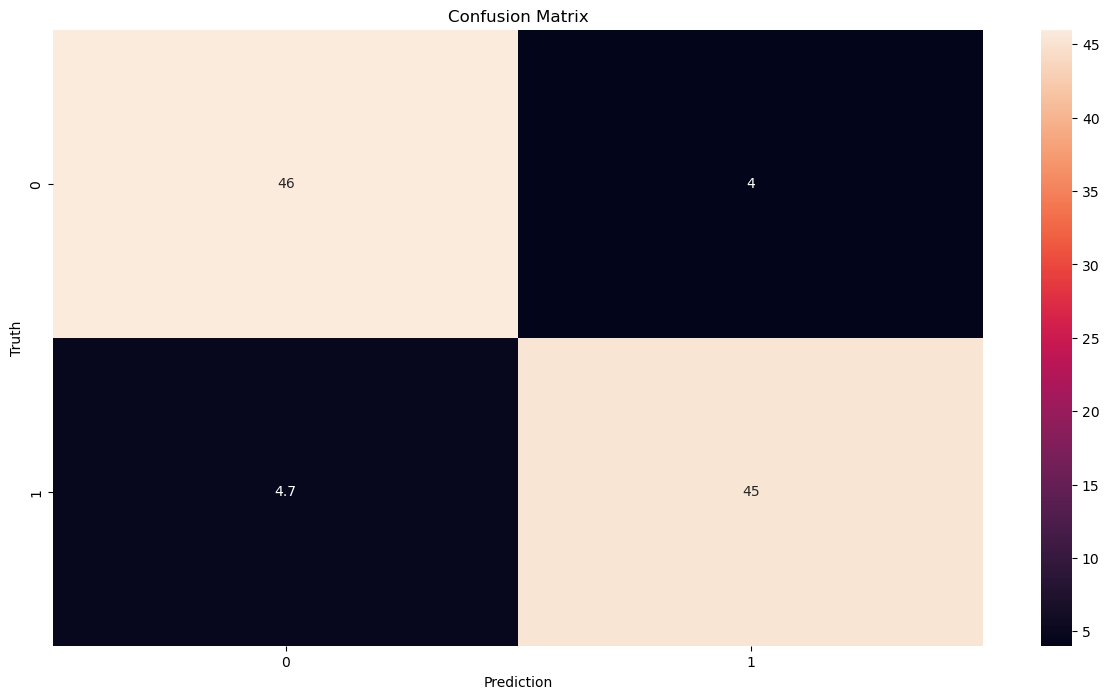

In [16]:
#logistic regression confusion matrix
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test1, y_test_pred_lr_pp1)/cm(y_test1, y_test_pred_lr_pp1).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see this model has 46% True Negatives (Predicted not fraud when it is actually not fraud),  45% True Positives (Predicted fraud that is actually fraud), 4.7% False Negatives (Predicted no fraud when there was fraud) and 4% False Positives (Predicted fraud when there was no fraud) 

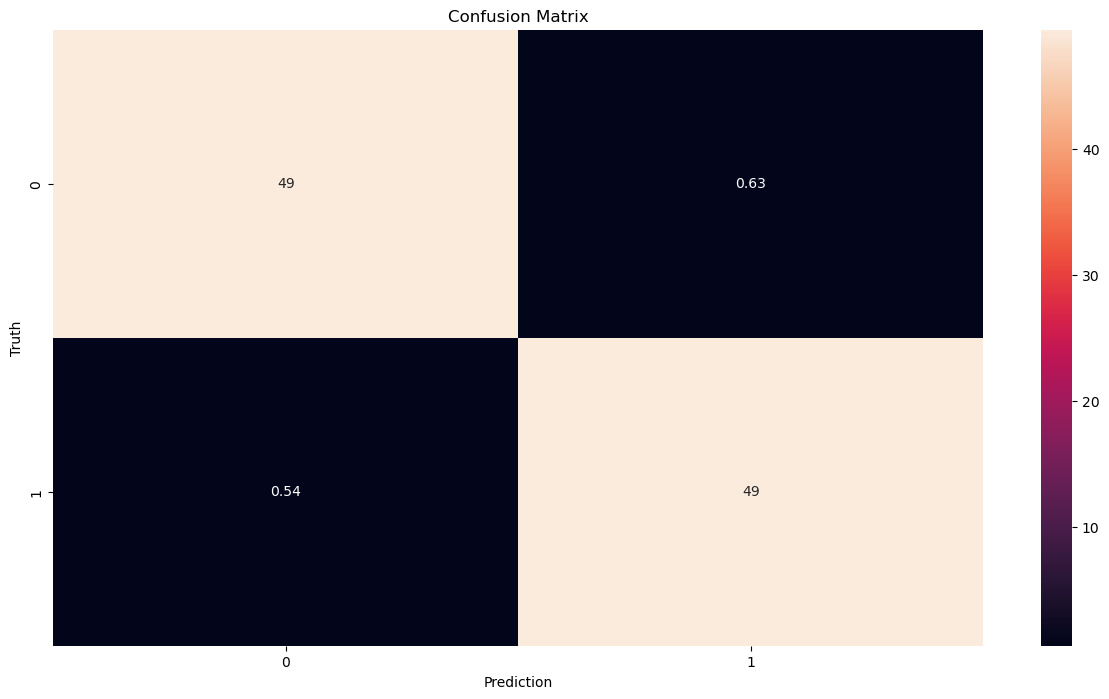

In [49]:
#Decision tree confusion matrix
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test1, y_test_pred_dt_pp1)/cm(y_test1, y_test_pred_dt_pp1).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see this model has 49% True Negatives (Predicted not fraud when it is actually not fraud),  49% True Positives (Predicted fraud that is actually fraud), 0.54% False Negatives (Predicted no fraud when there was fraud) and 0.63% False Positives (Predicted fraud when there was no fraud) 

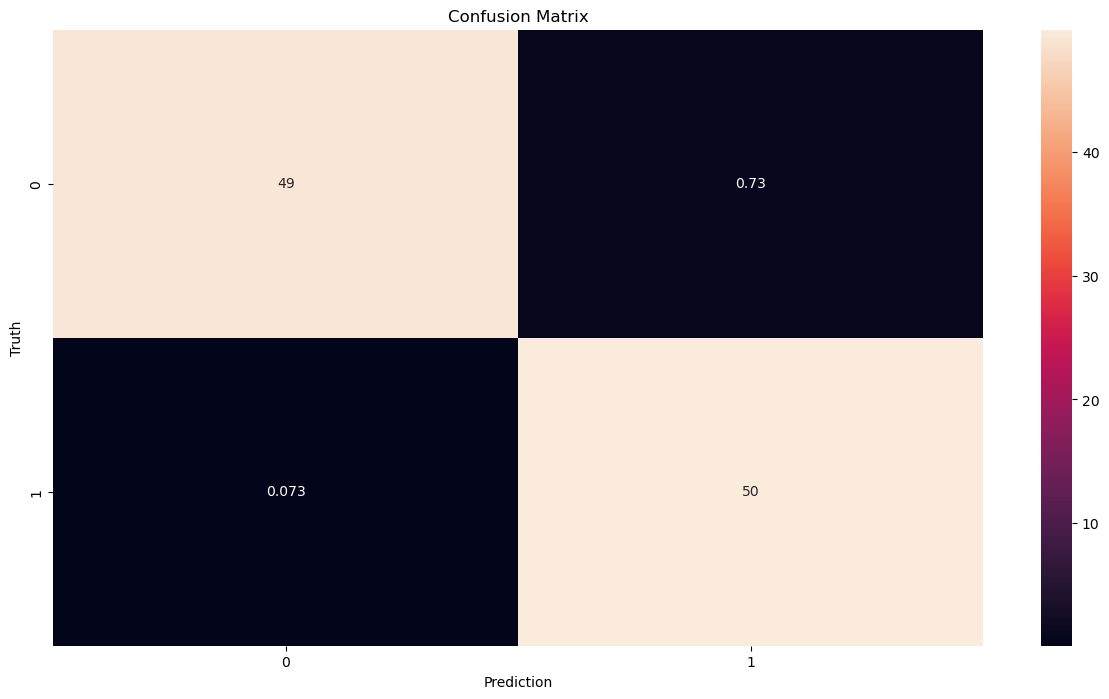

In [50]:
#Random forest confusion matrix
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test1, y_test_pred_rf_pp1)/cm(y_test1, y_test_pred_rf_pp1).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see this model has 49% True Negatives (Predicted not fraud when it is actually not fraud),  50% True Positives (Predicted fraud that is actually fraud), 0.073% False Negatives (Predicted no fraud when there was fraud) and 0.73% False Positives (Predicted fraud when there was no fraud) 

step: 0.03259475691908119
amount: 0.01034818602386165
oldbalanceOrg: 0.19302816329843353
newbalanceOrig: 0.06574953331710083
oldbalanceDest: 0.033568703838974055
newbalanceDest: 0.12634526418310196
isFlaggedFraud: 0.0
type_CASH_IN: 0.045824202580959296
type_CASH_OUT: 0.09462705949192428
type_DEBIT: 4.869734599461939e-05
type_PAYMENT: 0.06057138219300375
type_TRANSFER: 0.16368801233666094


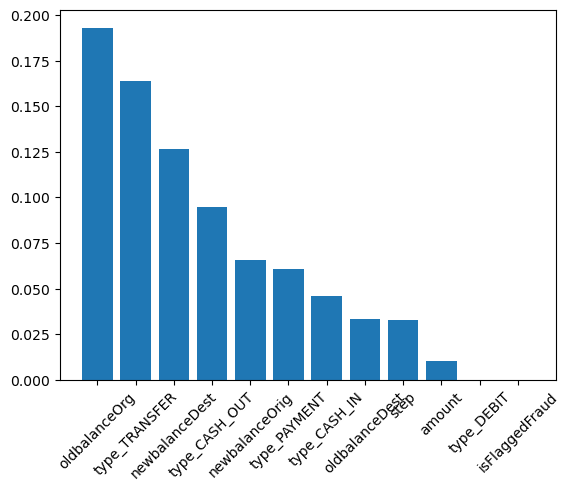

In [19]:
#calculating the importance of each column for the linear regression model

perm_importancepp1 = permutation_importance(lr_pp1, X_test1, y_test1, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp1.columns, perm_importancepp1.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp1.importances_mean.argsort()[::-1]
plt.bar(range(X_pp1.shape[1]), perm_importancepp1.importances_mean[sorted_idx])
plt.xticks(range(X_pp1.shape[1]), X_pp1.columns[sorted_idx], rotation=45)
plt.show()


step: 0.00250791331872409
amount: 0.15112409707004298
oldbalanceOrg: 0.3244054865676487
newbalanceOrig: 0.16617157698238774
oldbalanceDest: 0.04979303627952272
newbalanceDest: 0.04058923788653514
isFlaggedFraud: 2.4348672997320796e-05
type_CASH_IN: 0.0
type_CASH_OUT: 0.04293482671861046
type_DEBIT: 0.0
type_PAYMENT: 0.011768525282038748
type_TRANSFER: 0.065384303222141


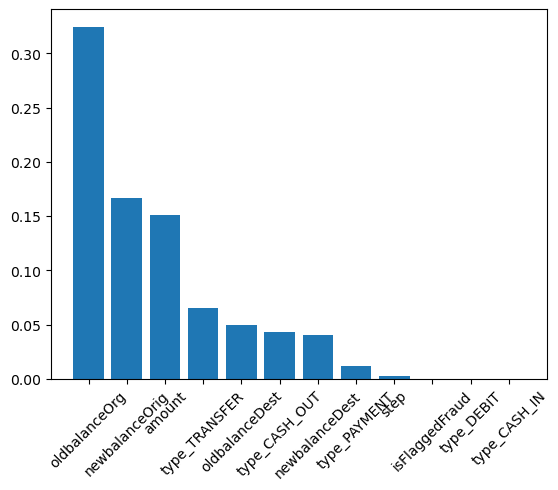

In [51]:
#calculating the importance of each column for the decision tree model

perm_importancepp1 = permutation_importance(dt_pp1, X_test1, y_test1, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp1.columns, perm_importancepp1.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp1.importances_mean.argsort()[::-1]
plt.bar(range(X_pp1.shape[1]), perm_importancepp1.importances_mean[sorted_idx])
plt.xticks(range(X_pp1.shape[1]), X_pp1.columns[sorted_idx], rotation=45)
plt.show()


step: 0.003733463192922611
amount: 0.06578199821443058
oldbalanceOrg: 0.21379758136514887
newbalanceOrig: 0.06540053567080589
oldbalanceDest: 0.029121012904796642
newbalanceDest: 0.05164353542731915
isFlaggedFraud: 0.0
type_CASH_IN: 0.00021913805697586496
type_CASH_OUT: 0.034883532180829416
type_DEBIT: -8.116224332443966e-06
type_PAYMENT: 0.0072883694505315655
type_TRANSFER: 0.028560993425858237


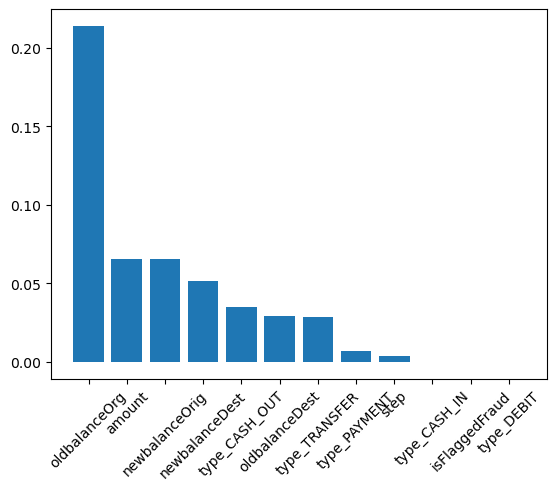

In [52]:
#calculating the importance of each column for the random forest model

perm_importancepp1 = permutation_importance(rf_pp1, X_test1, y_test1, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp1.columns, perm_importancepp1.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp1.importances_mean.argsort()[::-1]
plt.bar(range(X_pp1.shape[1]), perm_importancepp1.importances_mean[sorted_idx])
plt.xticks(range(X_pp1.shape[1]), X_pp1.columns[sorted_idx], rotation=45)
plt.show()


## Preprocessing 2

Removing outliers,downsampling non-fraud cases, using labelencoder to convert column 'type' to numerical, standardising using minmax. 

In [21]:
data_pp2=pd.read_csv('../../data/second/data_pp2.csv')

Opening my data

In [22]:
data_pp2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,252,3,9705.01,97382.00,87676.99,0.00,0.0,0,0
1,130,3,1418.55,0.00,0.00,0.00,0.0,0,0
2,19,3,41906.02,24888.89,0.00,0.00,0.0,0,0
3,358,3,27369.17,22002.00,0.00,0.00,0.0,0,0
4,228,1,26945.32,29732.00,2786.68,702178.98,729124.3,0,0


In [23]:
X_pp2=data_pp2.drop('isFraud', axis=1)
y_pp2=data_pp2['isFraud']

Defining my target column

In [24]:
X_train2, X_test2, y_train2, y_test2 = tts(X_pp2, y_pp2, 
                                       random_state=42,
                                       stratify=y_pp2)

Dividing into train and test

In [25]:
scaler = MinMaxScaler()
 
scaler.fit(X_train2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
 
X_train2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.transform(X_train2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])   
X_test2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.transform(X_test2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])  


Standardizing the data using minmaxscaler

In [26]:
X_train2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
37585,156,3,0.004310,0.633483,0.465212,0.000000,0.000000,0
194824,539,4,0.158660,0.296739,0.000000,0.000000,0.000000,0
67249,191,3,0.019503,0.156037,0.088934,0.000000,0.000000,0
152998,336,4,0.408893,0.764745,0.000000,0.000000,0.000000,0
282809,450,4,0.043272,0.080930,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
77003,250,0,0.327474,0.151030,0.567918,0.208790,0.118281,0
54792,237,3,0.012822,0.001320,0.000000,0.000000,0.000000,0
53063,236,3,0.019832,0.042243,0.003832,0.000000,0.000000,0
211491,59,4,0.019433,0.036345,0.000000,0.000000,0.000000,0


checking the data after standardization

In [53]:
lr_pp2=LogisticRegression()
dt_pp2=DecisionTreeClassifier()
rf_pp2=RandomForestClassifier()

Initiated the models

In [54]:
lr_pp2.fit(X_train2, y_train2)
dt_pp2.fit(X_train2, y_train2)
rf_pp2.fit(X_train2, y_train2)

RandomForestClassifier()

Fitting the models

In [55]:
y_test_pred_lr_pp2 = lr_pp2.predict(X_test2)
y_test_pred_dt_pp2 = dt_pp2.predict(X_test2)
y_test_pred_rf_pp2 = rf_pp2.predict(X_test2)

In [56]:
y_train_pred_lr_pp2 = lr_pp2.predict(X_train2)
y_train_pred_dt_pp2 = dt_pp2.predict(X_train2)
y_train_pred_rf_pp2 = rf_pp2.predict(X_train2)

Getting the predictions

In [60]:
results_lr_pp2= metrics(y_test2, y_test_pred_lr_pp2, y_train2, y_train_pred_lr_pp2, 'Logistic Regression pp2')
results_dt_pp2= metrics(y_test2, y_test_pred_dt_pp2, y_train2, y_train_pred_dt_pp2, 'Decision Tree pp2')
results_rf_pp2= metrics(y_test2, y_test_pred_rf_pp2, y_train2, y_train_pred_rf_pp2, 'Random Forest pp2')

Getting the metrics for the model

In [61]:
results_pp2=pd.concat([results_lr_pp2, results_dt_pp2, results_rf_pp2], axis=0)
results_pp2

,accuracy,precision,recall,f1,kapppa,set,model
0,0.929907,0.941310,0.916987,0.928989,0.859813,test,Logistic Regression pp2
1,0.930360,0.940401,0.918960,0.929557,0.860720,train,Logistic Regression pp2
0,0.999293,0.998589,1.000000,0.999294,0.998587,test,Decision Tree pp2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree pp2
0,0.999253,0.998509,1.000000,0.999254,0.998507,test,Random Forest pp2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Random Forest pp2


Again, we can see that the logistic regression model is working fairly well, but could be improved. As for the Decision Tree and Random Forest they are working perfectly well. 

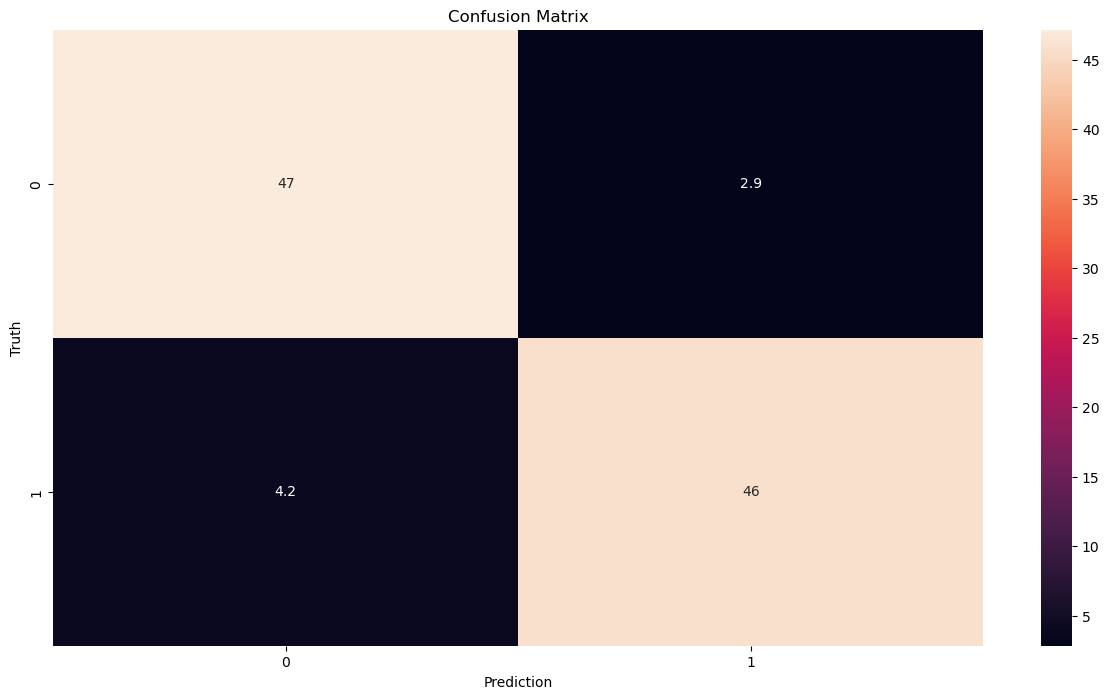

In [33]:
#linear regression confusion matrix
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test2, y_test_pred_lr_pp2)/cm(y_test2, y_test_pred_lr_pp2).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();



From the confusion matrix above we can see this model has 47% True Negatives (Predicted not fraud when it is actually not fraud),  46% True Positives (Predicted fraud that is actually fraud), 4.2% False Negatives (Predicted no fraud when there was fraud) and 2.9% False Positives (Predicted fraud when there was no fraud) 

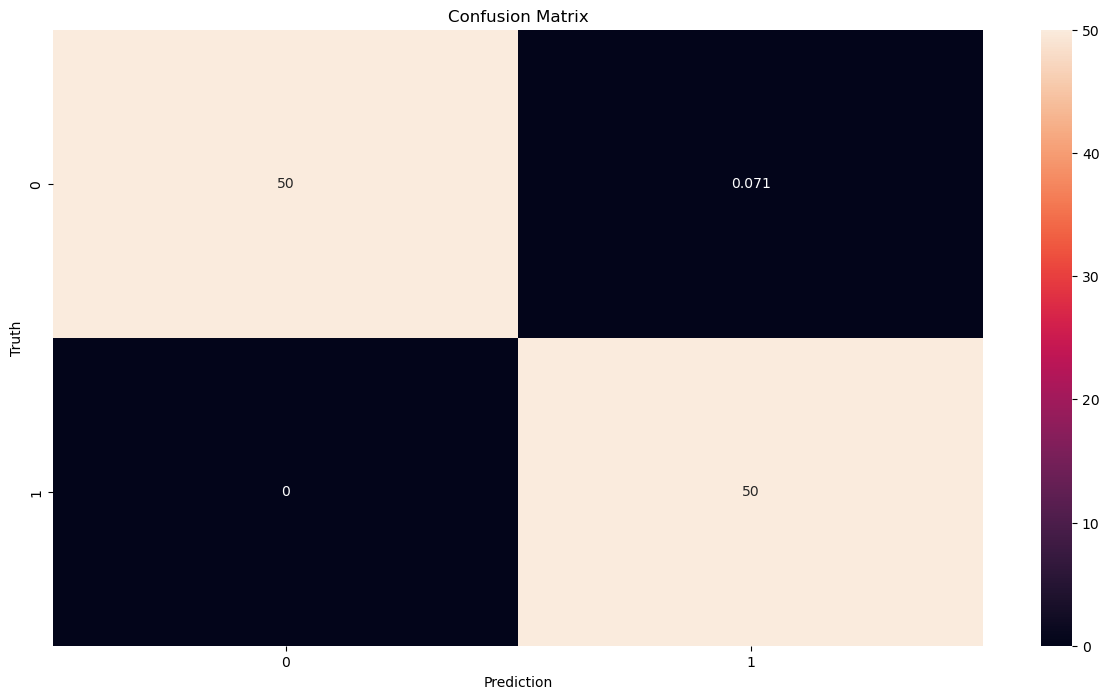

In [62]:
#decision tree confusion matrix
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test2, y_test_pred_dt_pp2)/cm(y_test2, y_test_pred_dt_pp2).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see this model has 50% True Negatives (Predicted not fraud when it is actually not fraud),  50% True Positives (Predicted fraud that is actually fraud), 0% False Negatives (Predicted no fraud when there was fraud) and 0.071% False Positives (Predicted fraud when there was no fraud) 

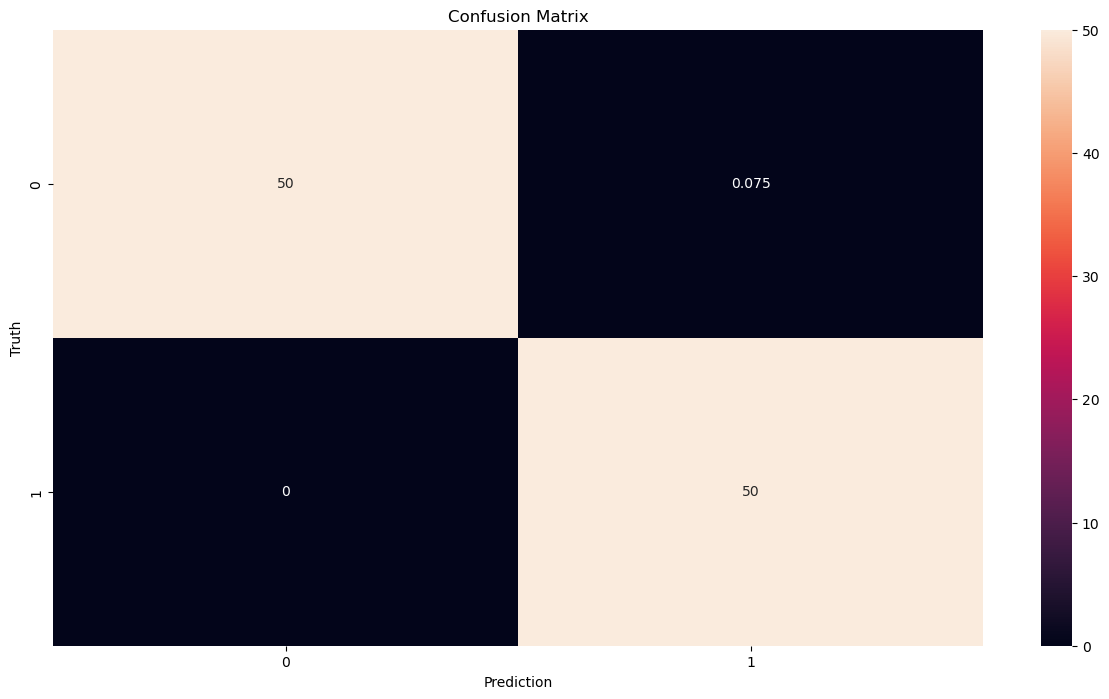

In [63]:
#random forest confusion matrix
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test2, y_test_pred_rf_pp2)/cm(y_test2, y_test_pred_rf_pp2).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see this model has 50% True Negatives (Predicted not fraud when it is actually not fraud),  50% True Positives (Predicted fraud that is actually fraud), 0% False Negatives (Predicted no fraud when there was fraud) and 0.075% False Positives (Predicted fraud when there was no fraud) 

step: 0.00015733333333332045
type: 0.008420444444444427
amount: 0.16021822222222223
oldbalanceOrg: 0.3949311111111111
newbalanceOrig: 0.16352088888888885
oldbalanceDest: 0.026359999999999988
newbalanceDest: 0.008577777777777773
isFlaggedFraud: 0.0


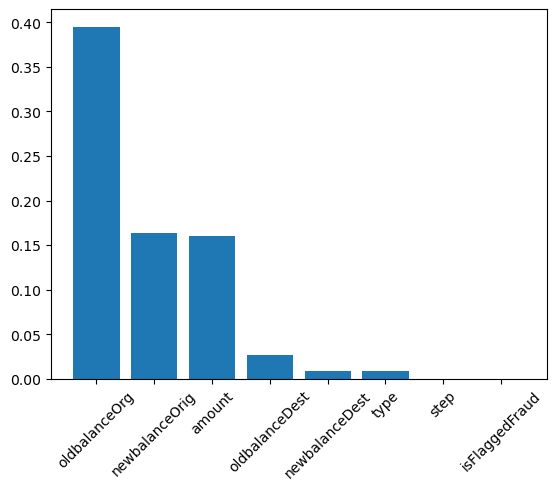

In [37]:
#calculating the importance of each column for logistic regression model
perm_importancepp2_lr = permutation_importance(lr_pp2, X_test2, y_test2, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp2.columns, perm_importancepp2_lr.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp2_lr.importances_mean.argsort()[::-1]
plt.bar(range(X_pp2.shape[1]), perm_importancepp2_lr.importances_mean[sorted_idx])
plt.xticks(range(X_pp2.shape[1]), X_pp2.columns[sorted_idx], rotation=45)
plt.show()


step: 0.02114888888888893
type: 0.2601608888888889
amount: 0.13885777777777783
oldbalanceOrg: 0.1925955555555556
newbalanceOrig: 0.10120088888888891
oldbalanceDest: 0.12155200000000005
newbalanceDest: 0.22854000000000005
isFlaggedFraud: 0.0


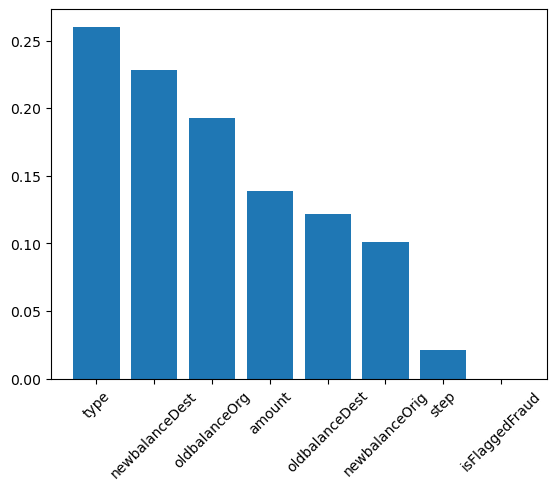

In [66]:
#calculating the importance of each column for the decision tree model
perm_importancepp2_dt = permutation_importance(dt_pp2, X_test2, y_test2, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp2.columns, perm_importancepp2_dt.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp2_lr.importances_mean.argsort()[::-1]
plt.bar(range(X_pp2.shape[1]), perm_importancepp2_dt.importances_mean[sorted_idx])
plt.xticks(range(X_pp2.shape[1]), X_pp2.columns[sorted_idx], rotation=45)
plt.show()


## Combining the results

In [69]:
results=pd.concat([results_pp1, results_pp2, ], axis=0)

In [70]:
results

,accuracy,precision,recall,f1,kapppa,set,model
0,0.912345,0.918438,0.905017,0.911678,0.824689,test,Logistic Regression pp1
1,0.914522,0.917990,0.910390,0.914174,0.829045,train,Logistic Regression pp1
0,0.988313,0.987360,0.989284,0.988321,0.976625,test,Decision Tree pp1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree pp1
0,0.991965,0.985577,0.998539,0.992015,0.983930,test,Random Forest pp1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Random Forest pp1
0,0.929907,0.941310,0.916987,0.928989,0.859813,test,Logistic Regression pp2
1,0.930360,0.940401,0.918960,0.929557,0.860720,train,Logistic Regression pp2
0,0.999293,0.998589,1.000000,0.999294,0.998587,test,Decision Tree pp2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree pp2


## Conclusions:

The preprocessing that works the best for this data is pp2. For both models we see that the train metrics are slightly better than the test data. This is normal. What we want to avoid is for a big difference between the test and train sets. If the train set´s metrics are a significantly higher than the test´s then it means that the model is overfitted (which is not the case here). 


In [71]:
#Saving the models
pickle.dump(lr_pp1, open('models/logistic_regression_pp1.pk', 'wb'))  
pickle.dump(dt_pp1, open('models/decision_tree_pp1.pk', 'wb'))  
pickle.dump(rf_pp1, open('models/random_forest_pp1.pk', 'wb'))  
pickle.dump(lr_pp2, open('models/logistic_regression_pp2.pk', 'wb'))  
pickle.dump(dt_pp2, open('models/decision_tree_pp2.pk', 'wb'))  
pickle.dump(rf_pp2, open('models/random_forest_pp2.pk', 'wb'))  